In [1]:
from sklearn.decomposition import PCA
from model import main, parse_args
import argparse

# Define the arguments you want to pass
args = argparse.Namespace(
    BATCH_SIZE=8,
    BLOCK_SIZE=16,
    DROPOUT=0.3,
    LEARNING_RATE=0.0001,
    EPOCHS=10000,
    FRAMES_GENERATE=300,
    TRAIN=True,
    EVAL_EVERY=1000,
    CHECKPOINT_PATH="checkpoints/proto8_checkpoint.pth",
    L1_LAMBDA=None,
    L2_REG=0.0,
    FINETUNE=False,
    FINE_TUNING_LR=1e-5,
    FINE_TUNING_EPOCHS=100000,
    PENALTY=False,
    LATENT_VIS_EVERY=1000,
    
    # NOTES---------------------------------
    notes = f"""Proto8 - trying to adapt Pette et al 2019, addign latent visualisation and analysing latent space. Might be slow, maybe take this out when live.

    All data, added 10% noise to emotions so model is less stuck. With LeakyRelu
    Loss = mse_loss(keypoints) + mse_loss(emotions) because before output emotions ( which feature was added to keypoint features) were not being matched to input emotions
    No penalty.

    Added dropout to keypoints, also changed input to emotion linear to x and not just emotion (emotion + keypoints)
    Taking extra dropout for emotions and keypoints out, because want model to rely on both equally so what's the point

    dropout keypoints and dropout emotion is currently equal but might change this.

    Emotions and keypoints are multimodal and added separately, but features are added in block processing using +.


    Got rid of both L1 and L2, increasing dropout because model acting weird, this is now delta + coord. 
    Delta is between next frame and current frame. So current frame is previous coord+previous delta. Last frame's delta is 0. 
    """
)

latent_space, train_seed = main(args)




C:\Users\avika\OneDrive\Documents\UAL\interactive_dance_thesis

    Batch size set to: 8
    Block size set to: 16
    Dropout rate set to: 0.3
    Learning rate set to: 0.0001
    Number of epochs set to: 10000
    Frames to generate set to: 300
    Training mode set to: True
    Evaluation every set to: 1000
    Checkpoint path set to: checkpoints/proto8_checkpoint.pth
    L1 regularization lambda set to: None
    L2 regularization lambda set to: 0.0
    Fine-tuning mode set to: False
    Fine-tuning learning rate set to: 1e-05
    Fine-tuning epochs set to: 100000
    Penalty flag set to: False
    Latent visualization every set to: 1000
    
Preparing data for all...


100%|██████████| 4102/4102 [00:15<00:00, 266.55it/s]


Validating interpolation...
No errors found!


4102it [00:01, 2455.75it/s]
4102it [00:01, 2347.96it/s]
100%|██████████| 109/109 [00:06<00:00, 15.85it/s]


Validating interpolation...
No errors found!


109it [00:00, 279.86it/s]
109it [00:00, 291.10it/s]


Creating keypoint frames...


100%|██████████| 4211/4211 [00:03<00:00, 1244.96it/s]


Creating keypoint frames...


100%|██████████| 4211/4211 [00:03<00:00, 1294.90it/s]


Validating length of dkp_frames
Validating length of kp_frames
Adding deltas to frames...


4211it [00:04, 1002.12it/s]


Validating length of data after delta
frame_dim: 100
Training model 41819...


Training:   0%|          | 0/10000 [00:00<?, ?epoch/s]

Evaluating loss...


Training:   0%|          | 4/10000 [00:03<1:46:27,  1.56epoch/s]


Train loss: 1.827983 val loss: 1.829628


Training:  10%|█         | 1000/10000 [00:46<06:41, 22.40epoch/s]

Evaluating loss...


Training:  10%|█         | 1003/10000 [00:49<48:40,  3.08epoch/s]


Train loss: 0.002928 val loss: 0.003014


Training:  20%|█▉        | 1999/10000 [01:32<05:29, 24.29epoch/s]

Evaluating loss...


Training:  20%|██        | 2002/10000 [01:35<40:55,  3.26epoch/s]


Train loss: 0.001833 val loss: 0.002032


Training:  30%|██▉       | 2998/10000 [02:17<05:02, 23.16epoch/s]

Evaluating loss...


Training:  30%|███       | 3004/10000 [02:21<28:20,  4.12epoch/s]


Train loss: 0.001648 val loss: 0.001457


Training:  40%|████      | 4000/10000 [03:04<04:25, 22.58epoch/s]

Evaluating loss...


Training:  40%|████      | 4003/10000 [03:07<31:07,  3.21epoch/s]


Train loss: 0.001234 val loss: 0.001228


Training:  50%|████▉     | 4999/10000 [03:50<03:22, 24.68epoch/s]

Evaluating loss...


Training:  50%|█████     | 5005/10000 [03:53<19:13,  4.33epoch/s]


Train loss: 0.001293 val loss: 0.001407


Training:  60%|█████▉    | 5998/10000 [04:35<02:52, 23.25epoch/s]

Evaluating loss...


Training:  60%|██████    | 6004/10000 [04:38<15:35,  4.27epoch/s]


Train loss: 0.001336 val loss: 0.001427


Training:  70%|███████   | 7000/10000 [05:21<02:07, 23.55epoch/s]

Evaluating loss...


Training:  70%|███████   | 7003/10000 [05:24<15:50,  3.15epoch/s]


Train loss: 0.000996 val loss: 0.001065


Training:  80%|███████▉  | 7999/10000 [06:07<01:27, 22.74epoch/s]

Evaluating loss...


Training:  80%|████████  | 8005/10000 [06:10<08:02,  4.14epoch/s]


Train loss: 0.001180 val loss: 0.001030


Training:  90%|████████▉ | 8998/10000 [06:53<00:42, 23.58epoch/s]

Evaluating loss...


Training:  90%|█████████ | 9004/10000 [06:56<03:45,  4.42epoch/s]


Train loss: 0.000874 val loss: 0.000924


Training: 100%|██████████| 10000/10000 [07:39<00:00, 21.76epoch/s]


-> Best model so far (val loss: inf), saving model...
Saving model checkpoint to checkpoints/proto8_checkpoint.pth
Checkpoint saved to checkpoints/proto8_checkpoint.pth
Model 41819 saved!
Generating sequence of 300 frames...
Creating directory D:\Interactive Dance Thesis Tests\TransformerResults\41819


Visualizing frames: 100%|██████████| 300/300 [00:32<00:00,  9.17it/s]


Notes saved to D:\Interactive Dance Thesis Tests\TransformerResults\41819\notes_1.txt
Done!


In [2]:
latent_space.shape

(80, 16, 512)

In [11]:
latent_space_reshaped.shape[0]

1280

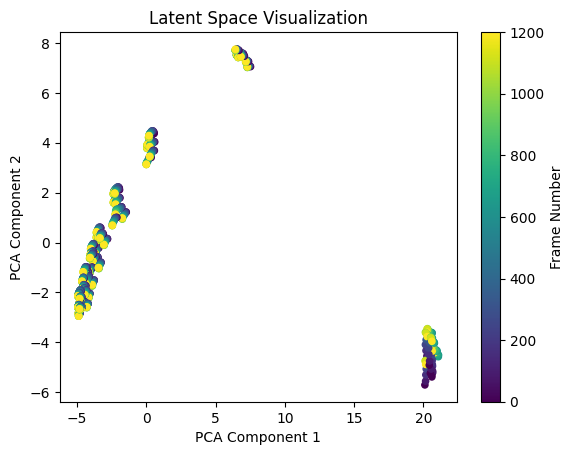

In [13]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suppose latent_space has shape (n_sequences, n_samples, n_features)
# You need to reshape it to (n_sequences * n_samples, n_features)
n_sequences, n_samples, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_sequences * n_samples, n_features)

# Now you can apply PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Generate the corresponding frame numbers
# This assumes each sequence is a continuous range of frame numbers
frame_numbers = np.concatenate([np.arange(n_samples) * n_sequences for _ in range(n_sequences)])

# Now you can plot the PCA-reduced data, coloring by frame number
plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=frame_numbers, cmap='viridis', s=20)
plt.colorbar(label='Frame Number')
plt.title('Latent Space Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


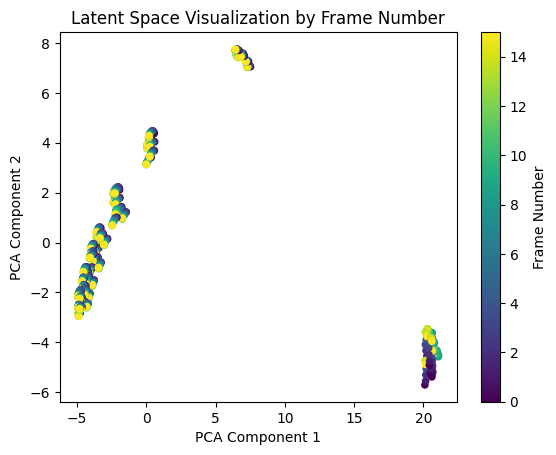

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming latent_space has shape (n_batches, n_frames_per_batch, n_features)
n_batches, n_frames_per_batch, n_features = latent_space.shape

# Flatten the latent space to 2D for PCA
latent_space_reshaped = latent_space.reshape(n_batches * n_frames_per_batch, n_features)

# Perform PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Create an array of frame numbers
# This assumes that frames within each batch follow a continuous sequence
frame_numbers = np.tile(np.arange(n_frames_per_batch), n_batches)

# Now plot the PCA-reduced data, coloring by frame number
plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=frame_numbers, cmap='viridis', s=20)
plt.colorbar(label='Frame Number')
plt.title('Latent Space Visualization by Frame Number')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


C:\Users\avika\AppData\Local\Temp\ipykernel_708660\4073392390.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, n_epoch_batches))


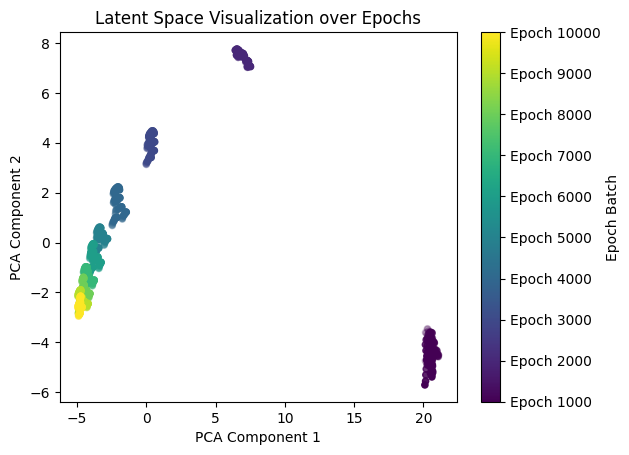

In [15]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

# Let's say latent_space is your (80, 16, 512) array
# Flatten the first two dimensions
n_epochs, n_time_steps, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_epochs * n_time_steps, n_features)

# Apply PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Create color mapping for epoch batches
n_epoch_batches = 10  # Adjust this if you have a different number of epoch batches
epoch_batch_colors = np.repeat(np.linspace(0, 1, n_epoch_batches), n_epochs / n_epoch_batches * n_time_steps)

# Create a graduated color mapping for time steps within the epoch batches
time_step_colors = np.tile(np.linspace(1, 0, n_time_steps), n_epochs)  # Dark to light for each time step

# Normalize the epoch batch colors to match the number of colors available in the colormap
sm = plt.cm.ScalarMappable(cmap='viridis', norm=Normalize(vmin=0, vmax=1))
sm.set_array([])

# Create the color for each point based on the epoch batch color and time step gradient
final_colors = sm.to_rgba(epoch_batch_colors)
final_colors[:, 3] = time_step_colors  # Set the alpha channel based on the time step gradient

# Plot the PCA-reduced data with color
scatter = plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=final_colors, s=20)

# Add a color bar for the epoch batches
cbar = plt.colorbar(sm, ticks=np.linspace(0, 1, n_epoch_batches))
cbar.ax.set_yticklabels([f'Epoch {(i+1)*args.LATENT_VIS_EVERY}' for i in range(n_epoch_batches)])  # Set the tick labels as batch numbers
cbar.set_label('Epoch Batch')

# Set plot title and labels
plt.title('Latent Space Visualization over Epochs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


C:\Users\avika\AppData\Local\Temp\ipykernel_708660\1593675236.py:38: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  batch_cbar = plt.colorbar(batch_sm, ticks=np.linspace(0, 1, n_epoch_batches))
C:\Users\avika\AppData\Local\Temp\ipykernel_708660\1593675236.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  time_cbar = plt.colorbar(time_sm, ticks=np.linspace(0, 1, n_time_steps), orientation='horizontal')


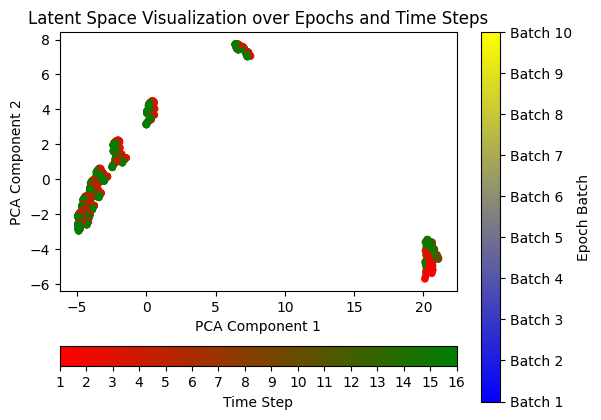

In [19]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Suppose latent_space is your (80, 16, 512) array
# Flatten the first two dimensions
n_epochs, n_time_steps, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_epochs * n_time_steps, n_features)

# Apply PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Create a gradient of colors for time steps within each epoch (red to green)
time_step_colors = np.tile(np.linspace(0, 1, n_time_steps), n_epochs)

# Create a gradient of colors for epoch batches (blue to yellow)
epoch_batch_colors = np.repeat(np.linspace(0, 1, n_epoch_batches), n_epochs / n_epoch_batches * n_time_steps)

# Create custom colormaps
time_cmap = LinearSegmentedColormap.from_list('time_cmap', ['red', 'green'])
batch_cmap = LinearSegmentedColormap.from_list('batch_cmap', ['blue', 'yellow'])

# Normalize the colors to use with the colormap
norm = plt.Normalize(vmin=0, vmax=1)

# Create the color for each point
time_colors = time_cmap(norm(time_step_colors))
batch_colors = batch_cmap(norm(epoch_batch_colors))

# Plot the PCA-reduced data with the epoch batch color
scatter = plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=batch_colors, s=20)

# Add a color bar for the epoch batches with blue to yellow gradient
batch_sm = plt.cm.ScalarMappable(cmap=batch_cmap, norm=norm)
batch_sm.set_array([])
batch_cbar = plt.colorbar(batch_sm, ticks=np.linspace(0, 1, n_epoch_batches))
batch_cbar.ax.set_yticklabels([f'Batch {i+1}' for i in range(n_epoch_batches)])  # Set the tick labels as batch numbers
batch_cbar.set_label('Epoch Batch')

# Plot again to add the time step color, without creating a new scatter object
scatter.set_facecolors(time_colors)

# Add a color bar for the time steps with red to green gradient
time_sm = plt.cm.ScalarMappable(cmap=time_cmap, norm=norm)
time_sm.set_array([])
time_cbar = plt.colorbar(time_sm, ticks=np.linspace(0, 1, n_time_steps), orientation='horizontal')
time_cbar.ax.set_xticklabels([f'{i+1}' for i in range(n_time_steps)])  # Set the tick labels as time steps
time_cbar.set_label('Time Step')

# Set plot title and labelss
plt.title('Latent Space Visualization over Epochs and Time Steps')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


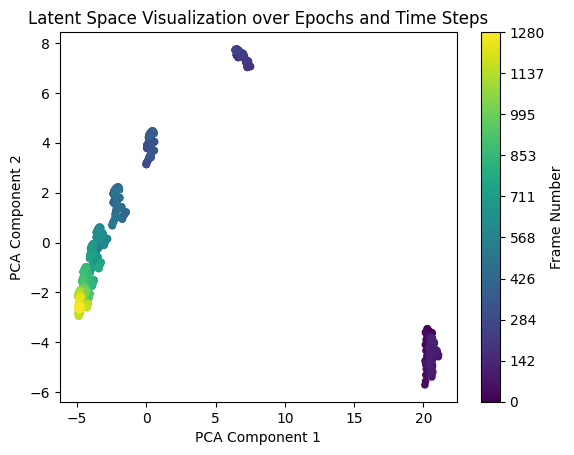

In [21]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Let's say latent_space is your (80, 16, 512) array
# Flatten the first two dimensions
n_epochs, n_time_steps, n_features = latent_space.shape
latent_space_reshaped = latent_space.reshape(n_epochs * n_time_steps, n_features)
# each frame and batch treated separately, so each frame is just plot 1 by 1

# Apply PCA
pca = PCA(n_components=2)
latent_vectors_2d = pca.fit_transform(latent_space_reshaped)

# Create normalized frame numbers for the color mapping
frame_numbers = np.linspace(0, 1, n_epochs * n_time_steps)

# Plot the PCA-reduced data, coloring by frame number
scatter = plt.scatter(latent_vectors_2d[:, 0], latent_vectors_2d[:, 1], c=frame_numbers, cmap='viridis', s=20)

# Create a color bar with labeled ticks
colorbar_ticks = np.linspace(0, 1, 10)  # 10 evenly spaced ticks from 0 to 1
colorbar_ticklabels = [f"{int(tick * (n_epochs * n_time_steps))}" for tick in colorbar_ticks]  # Scale ticks to frame numbers

cbar = plt.colorbar(scatter, ticks=colorbar_ticks)
cbar.ax.set_yticklabels(colorbar_ticklabels)
cbar.set_label('Frame Number')

# Set plot title and labels
plt.title('Latent Space Visualization over Epochs and Time Steps')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
